# PS 6

In [56]:
# import the sueful packages
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Imports
import numpy as np
import pandas as pd
import os
import sklearn

In [16]:
#read in data
data = pd.read_csv(r'C:\Users\PC\Desktop\Biden.csv')
data.head(n=5)

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


In [26]:
## give values to x and y
y = data['biden'].values
x_var_names = ['female','age','educ','dem','rep']
x = data[x_var_names].values

## see if we get x and y
list(x),list(y)

In [22]:
## we split the training data apart from the test data, taking 70% data to train, and 30% to test, set.seed = 25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25)

In [ ]:
## see if the split works
x_train, y_train, x_test, y_test

In [50]:
# Fit a decision tree on the training data
dtr = tree.DecisionTreeRegressor(max_depth=3,min_samples_leaf=5,random_state=25)
biden_tree = dtr.fit(x_train, y_train)
r = export_text(biden_tree, feature_names = x_var_names)
print(r)

|--- dem <= 0.50
|   |--- rep <= 0.50
|   |   |--- female <= 0.50
|   |   |   |--- value: [56.49]
|   |   |--- female >  0.50
|   |   |   |--- value: [61.27]
|   |--- rep >  0.50
|   |   |--- female <= 0.50
|   |   |   |--- value: [38.33]
|   |   |--- female >  0.50
|   |   |   |--- value: [44.89]
|--- dem >  0.50
|   |--- age <= 54.50
|   |   |--- educ <= 15.50
|   |   |   |--- value: [71.11]
|   |   |--- educ >  15.50
|   |   |   |--- value: [76.59]
|   |--- age >  54.50
|   |   |--- female <= 0.50
|   |   |   |--- value: [75.19]
|   |   |--- female >  0.50
|   |   |   |--- value: [80.29]



In [57]:
##test the data based on the training model
pred_train = dtr.predict(x_train)
pred_test = dtr.predict(x_test)
print('Mean squared error on the training data: %.2f'
      % sklearn.metrics.mean_squared_error(
          y_train,  #actual values
          pred_train)  # predicted values
     )
print('Mean squared error on the test data: %.2f'
      % sklearn.metrics.mean_squared_error(
          y_test,  #actual values
          pred_test)  # predicted values
     )
## Here we find a similar SSE for training data and test data. However, we should find SSE for test be bigger than for training.

Mean squared error on the training data: 390.47
Mean squared error on the test data: 396.19


[Text(465.0, 792.75, 'dem <= 0.5\nmse = 550.162\nsamples = 1807\nvalue = 62.164'),
 Text(232.5, 566.25, 'rep <= 0.5\nmse = 493.777\nsamples = 1027\nvalue = 52.741'),
 Text(116.25, 339.75, 'female <= 0.5\nmse = 437.654\nsamples = 656\nvalue = 58.415'),
 Text(58.125, 113.25, 'mse = 433.465\nsamples = 328\nvalue = 56.067'),
 Text(174.375, 113.25, 'mse = 430.821\nsamples = 328\nvalue = 60.762'),
 Text(348.75, 339.75, 'female <= 0.5\nmse = 435.452\nsamples = 371\nvalue = 42.709'),
 Text(290.625, 113.25, 'mse = 473.775\nsamples = 178\nvalue = 39.382'),
 Text(406.875, 113.25, 'mse = 380.484\nsamples = 193\nvalue = 45.777'),
 Text(697.5, 566.25, 'age <= 53.5\nmse = 353.571\nsamples = 780\nvalue = 74.571'),
 Text(581.25, 339.75, 'educ <= 15.5\nmse = 362.483\nsamples = 473\nvalue = 72.389'),
 Text(523.125, 113.25, 'mse = 381.523\nsamples = 346\nvalue = 71.003'),
 Text(639.375, 113.25, 'mse = 291.114\nsamples = 127\nvalue = 76.165'),
 Text(813.75, 339.75, 'female <= 0.5\nmse = 321.21\nsamples = 3

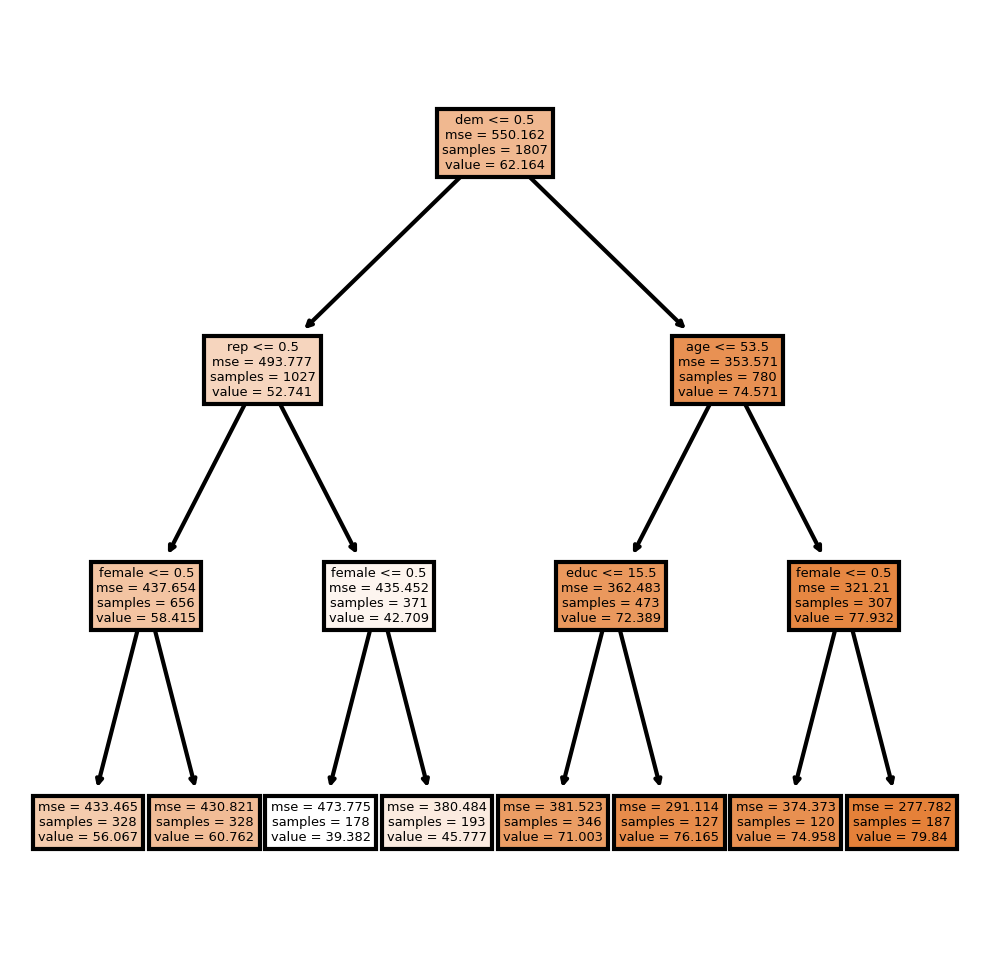

In [39]:
## plot the tree
fig,axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4),dpi=300)
tree.plot_tree(biden_tree,feature_names = x_var_names,filled = True)

In [58]:
# to test how it fit
MSE = mean_squared_error(y, biden_tree.predict(x))
print('The SSE of the biden tree of depth 3  and ',
      biden_tree.get_n_leaves(), ' leaves = ', MSE)

The SSE of the biden tree of depth 3  and  8  leaves =  392.1875032691762


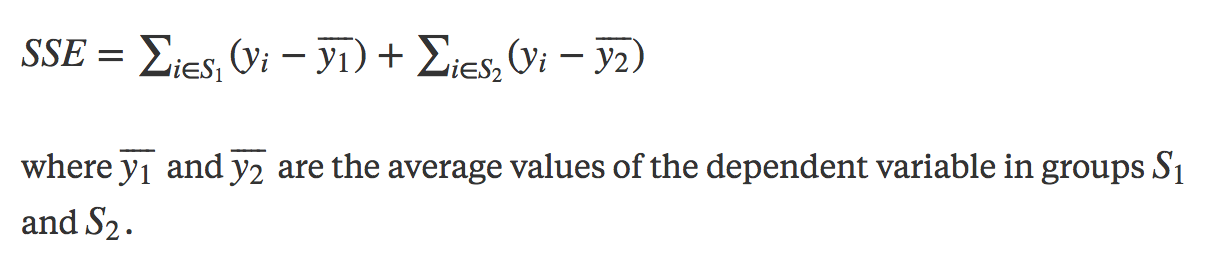

In [37]:
## interpreate SSE
# SSE measures the differences between each x,y and the average value of x,y. SSE gives us an indication of model variation.
# SSE is the impurity in regression trees. We want to minimize SSE, but also avoid over fitting the model.

Question 2

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
from scipy . stats import randint as sp_randint
param_dist = {'max_depth': [3 , 10],
                'min_samples_split': sp_randint (2 , 20 ) ,
                'min_samples_leaf': sp_randint (2 , 20 )}

In [67]:
# we try to find out the best parameters
dtr.get_params().keys()
clf = RandomizedSearchCV(dtr, param_dist, n_iter=100, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
search=clf.fit(x,y)
search.best_params_
search.best_score_

-401.713307249986

In [62]:
# the results are
# {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 14}
# SSE = -401.713307249986

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

Question 3

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [72]:
param_dist1 = {'n_estimators': [10 , 200],
'max_depth': [3 , 10],
'min_samples_split': sp_randint (2 , 20 ) ,
'min_samples_leaf': sp_randint (2 , 20 ) ,
'max_features': sp_randint (1 , 5)}

In [73]:
regr = RandomizedSearchCV(RandomForestRegressor(),param_dist1, 
                          n_iter=100, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

In [76]:
search1 = regr.fit(x,y)
search1.best_params_
search1.best_score_

-396.91992813244644

In [ ]:
# results
# {'max_depth': 3,'max_features': 3,'min_samples_leaf': 18,'min_samples_split': 6,'n_estimators': 200}
# SSE = -396.91992813244644